In [ ]:
!pip install gdown  # Ensure gdown is installed

In [ ]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1cVsZhmuwJqqik285_Zv4WQ4XlXxkKtGB"
output_file = "leaf_disease_segmentation.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1cVsZhmuwJqqik285_Zv4WQ4XlXxkKtGB
From (redirected): https://drive.google.com/uc?id=1cVsZhmuwJqqik285_Zv4WQ4XlXxkKtGB&confirm=t&uuid=06e3228e-1324-4cba-a784-59d180ac0820
To: /content/leaf_disease_segmentation.zip
100%|██████████| 47.1M/47.1M [00:00<00:00, 79.3MB/s]


'leaf_disease_segmentation.zip'

In [ ]:
import zipfile
z = zipfile.ZipFile('/content/leaf_disease_segmentation.zip')
z.extractall()

In [ ]:
import os
import shutil

src = 'leaf_disease_segmentation'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'leaf_disease_segmentation' to 'datasets/leaf_disease_segmentation' successfully.


## **Importing libraries**

In [ ]:
import yaml

# Define YAML configuration
data = {
    'path': 'leaf_disease_segmentation',
    'train': 'train/images',
    'val': 'train/images',
    'nc': 1,
    'names': ['Leaf Disease']
}

# Save to pothole.yaml
with open('leaf_disease_segmentation.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("leaf_disease_segmentation.yaml created successfully!")


leaf_disease_segmentation.yaml created successfully!


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv9 segmentation model
model = YOLO('yolov9e-seg.pt')  # You can switch to yolov8s-seg.pt or yolov8m-seg.pt if needed

# Train the model with data augmentation
model.train(
    data='leaf_disease_segmentation.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='leaf_disease_segmentation_yolov8',
    save=True,
    save_period=-1,
    patience=20,
    val=True,

    # Data augmentation parameters
    degrees=10,        # Rotate image ±10 degrees
    translate=0.1,     # Translate image ±10%
    scale=0.5,         # Scale image between 0.5–1.5
    shear=2.0,         # Shear image by ±2 degrees
    perspective=0.001, # Perspective distortion
    flipud=0.5,        # Vertical flip 50% of the time
    fliplr=0.5,        # Horizontal flip 50% of the time
    hsv_h=0.015,       # Hue augmentation
    hsv_s=0.7,         # Saturation augmentation
    hsv_v=0.4          # Value (brightness) augmentation
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


  0%|          | 23.5k/117M [00:00<01:16, 1.59MB/s]


Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=leaf_disease_segmentation.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9e-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=leaf_disease_segmentation_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.001, p

100%|██████████| 755k/755k [00:00<00:00, 98.8MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.linear.Identity             []                            
  1                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  2                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  3                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
  4                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  5                  -1  1   1004032  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 2]       
  6                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  7                  -1  1   4006912  ultralytics

 13                   7  1    984000  ultralytics.nn.modules.block.CBLinear        [1024, [64, 128, 256, 512]]   
 14                   9  1   2033600  ultralytics.nn.modules.block.CBLinear        [1024, [64, 128, 256, 512, 1024]]
 15                   0  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
 16[10, 11, 12, 13, 14, -1]  1         0  ultralytics.nn.modules.block.CBFuse          [[0, 0, 0, 0, 0]]             
 17                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
 18[11, 12, 13, 14, -1]  1         0  ultralytics.nn.modules.block.CBFuse          [[1, 1, 1, 1]]                
 19                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
 20                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
 21    [12, 13, 14, -1]  1         0  ultralytics.nn.modules.block.CBFuse        

100%|██████████| 5.35M/5.35M [00:00<00:00, 286MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.7±8.0 MB/s, size: 25.0 KB)


train: Scanning /content/datasets/leaf_disease_segmentation/train/labels... 588 images, 1 backgrounds, 0 corrupt: 100%|██████████| 588/588 [00:00<00:00, 778.53it/s]

train: New cache created: /content/datasets/leaf_disease_segmentation/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 302.2±233.6 MB/s, size: 19.4 KB)


val: Scanning /content/datasets/leaf_disease_segmentation/train/labels.cache... 588 images, 1 backgrounds, 0 corrupt: 100%|██████████| 588/588 [00:00<?, ?it/s]


Plotting labels to runs/segment/leaf_disease_segmentation_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 307 weight(decay=0.0), 323 weight(decay=0.0005), 322 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/leaf_disease_segmentation_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.7G      2.047      3.445      2.551      1.735        142        640: 100%|██████████| 74/74 [01:18<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]


                   all        588       5626    0.00219     0.0681    0.00117   0.000372    0.00012    0.00373      6e-05   2.14e-05

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50        12G      2.183      3.442      2.192      1.846         39        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.39it/s]


                   all        588       5626    0.00874      0.147    0.00459    0.00151    0.00731      0.113    0.00324   0.000998

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50        12G      2.197      3.389      2.095       1.83         70        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.42it/s]


                   all        588       5626      0.135      0.109     0.0515     0.0185      0.112     0.0761     0.0327     0.0104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.1G      2.205      3.417      2.145      1.859         22        640: 100%|██████████| 74/74 [01:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]


                   all        588       5626      0.281      0.256      0.165     0.0477      0.259      0.242      0.147     0.0361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50        12G      2.113      3.303      2.027      1.781         64        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626      0.279       0.24       0.16     0.0573      0.292      0.227      0.154      0.049

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.1G      2.106       3.24      1.942       1.77         63        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626      0.341      0.277      0.217     0.0817      0.337      0.276       0.21     0.0699

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50        11G      2.043      3.213      1.967      1.733         41        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]


                   all        588       5626      0.424      0.365      0.318      0.125      0.427      0.347      0.302      0.101

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.1G      1.999      3.135      1.875       1.67         70        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]

                   all        588       5626      0.463      0.376      0.338      0.121      0.456      0.359      0.324      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50        12G      2.027      3.136      1.885      1.691         57        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626      0.482      0.407      0.386      0.157      0.486      0.395      0.371      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50        12G      2.024       3.13      1.911      1.687         89        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.453      0.384      0.339      0.129      0.432      0.351      0.308      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50        12G       1.94      3.021      1.781      1.647         71        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]

                   all        588       5626      0.469      0.432      0.392      0.165      0.465      0.405      0.363      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.1G      1.937      3.047      1.799      1.622         70        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.40it/s]


                   all        588       5626      0.462      0.408      0.384      0.153      0.445      0.384      0.355      0.124

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50        12G      1.904       2.97      1.765      1.626         93        640: 100%|██████████| 74/74 [01:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626       0.46      0.433      0.367      0.158      0.468      0.425      0.368      0.141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.8G      1.888      2.978      1.744      1.609         29        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626      0.515      0.446      0.446      0.182       0.51      0.424      0.415      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50        12G      1.923      2.929      1.712      1.617        109        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]


                   all        588       5626      0.506      0.432      0.422       0.17      0.477      0.414      0.387      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.1G      1.852      2.949      1.725      1.609         80        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]

                   all        588       5626      0.515      0.455      0.445      0.191      0.508      0.432      0.419      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.1G      1.858      2.868      1.702      1.596         33        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626       0.52      0.452      0.446      0.185        0.5      0.419      0.403       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50        12G      1.873      2.852      1.651      1.577         95        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.532      0.472      0.454      0.205      0.545      0.455      0.445      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.9G      1.839      2.897      1.644      1.606         62        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]

                   all        588       5626      0.518      0.469      0.448      0.195      0.531      0.465      0.443      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50        12G      1.828      2.849      1.656      1.571        120        640: 100%|██████████| 74/74 [01:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.511      0.471      0.441      0.198      0.512      0.451       0.43      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50        12G      1.827      2.846      1.626      1.565         98        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.42it/s]

                   all        588       5626      0.539      0.457      0.454      0.197      0.531      0.431       0.42      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50        12G      1.785      2.841      1.586      1.557         30        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.40it/s]


                   all        588       5626       0.54      0.479      0.462      0.209       0.53      0.455      0.442      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.9G       1.78      2.758       1.57       1.54        133        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]

                   all        588       5626      0.553      0.504      0.497      0.223      0.555      0.486      0.479      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.1G      1.788      2.813      1.552       1.54         37        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]

                   all        588       5626      0.579      0.482      0.506      0.222      0.573      0.451      0.474      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.1G      1.782      2.821      1.597      1.545         42        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626      0.572       0.49      0.504      0.226      0.562      0.438      0.455      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50        11G      1.739      2.744      1.499      1.516         53        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]

                   all        588       5626      0.512      0.465      0.453      0.198      0.507      0.434      0.418      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50        12G      1.731      2.753      1.534      1.504         87        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]

                   all        588       5626      0.573      0.495       0.51      0.228      0.562       0.46      0.472      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.1G      1.765      2.737      1.512      1.496         88        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]

                   all        588       5626      0.561      0.496      0.506      0.239      0.561      0.477      0.488      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.2G      1.735      2.726      1.489      1.524         52        640: 100%|██████████| 74/74 [01:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626       0.57      0.514       0.52      0.233      0.552      0.484      0.477      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.9G      1.718      2.722      1.462      1.484         62        640: 100%|██████████| 74/74 [01:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]

                   all        588       5626      0.585      0.494      0.521      0.246      0.586      0.483      0.503      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.7G       1.72      2.708      1.501      1.497         50        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.44it/s]

                   all        588       5626      0.553      0.484      0.498      0.241      0.563      0.455      0.481      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50        12G      1.687      2.678      1.452      1.483         89        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]


                   all        588       5626      0.569      0.531      0.527      0.254      0.569      0.492      0.497      0.202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50        12G      1.688      2.681      1.445      1.472         34        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.42it/s]


                   all        588       5626      0.586      0.533       0.55       0.26      0.587      0.476      0.503      0.203

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50        12G       1.69      2.661      1.428      1.466         30        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.595      0.545      0.562      0.273      0.592      0.516      0.532      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.8G       1.66      2.651      1.426      1.464         32        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]


                   all        588       5626      0.596      0.555      0.564      0.279      0.592      0.521      0.533      0.229

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.1G      1.666      2.664      1.451      1.468         79        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626        0.6       0.54      0.575      0.286      0.604      0.508      0.549      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50        12G      1.637      2.597      1.366      1.424         58        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.608      0.572      0.587      0.293      0.604       0.53      0.556      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.1G      1.655      2.649      1.393      1.474         37        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.603       0.55      0.574      0.286      0.606       0.52      0.548      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50        12G      1.596      2.541      1.352      1.431         43        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:26<00:00,  1.41it/s]


                   all        588       5626       0.59      0.546      0.569      0.275      0.582      0.499      0.529      0.221

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.1G      1.626      2.552       1.34      1.431         75        640: 100%|██████████| 74/74 [01:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.585      0.563      0.569      0.281       0.58      0.529      0.535      0.222


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50        12G      1.724      2.689      1.538      1.511         15        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.569      0.538      0.548      0.274      0.557      0.499      0.508      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50        12G      1.711      2.639      1.448      1.532         13        640: 100%|██████████| 74/74 [01:11<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626       0.63      0.544      0.589      0.294      0.628       0.52      0.563      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.6G      1.674      2.615      1.386       1.47         33        640: 100%|██████████| 74/74 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.627      0.565      0.595      0.295      0.613      0.535      0.559      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50        12G      1.657      2.592      1.381      1.471         26        640: 100%|██████████| 74/74 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.626      0.545      0.588      0.291      0.607      0.514      0.552      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50        12G      1.648      2.609      1.364      1.471         42        640: 100%|██████████| 74/74 [01:11<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.44it/s]

                   all        588       5626      0.644      0.574      0.616      0.309      0.639      0.539      0.583      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50        12G      1.638      2.581      1.375      1.451         29        640: 100%|██████████| 74/74 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.44it/s]

                   all        588       5626       0.63      0.568      0.608      0.309      0.619      0.525      0.563      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50        11G      1.635      2.565      1.335      1.465         37        640: 100%|██████████| 74/74 [01:11<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.44it/s]

                   all        588       5626      0.625       0.58       0.61      0.315       0.62      0.545      0.576      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.1G      1.635      2.595      1.368      1.468         10        640: 100%|██████████| 74/74 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.43it/s]

                   all        588       5626      0.655      0.571      0.621      0.315      0.648      0.538      0.583      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50        12G      1.616      2.561      1.306       1.46         32        640: 100%|██████████| 74/74 [01:11<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.44it/s]

                   all        588       5626      0.655       0.57      0.622      0.322      0.639      0.539      0.586      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50        12G       1.61      2.547      1.289      1.439         50        640: 100%|██████████| 74/74 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:25<00:00,  1.42it/s]

                   all        588       5626      0.634      0.587      0.625      0.323      0.629       0.55      0.585      0.256



50 epochs completed in 1.506 hours.
Optimizer stripped from runs/segment/leaf_disease_segmentation_yolov8/weights/last.pt, 121.9MB
Optimizer stripped from runs/segment/leaf_disease_segmentation_yolov8/weights/best.pt, 121.9MB

Validating runs/segment/leaf_disease_segmentation_yolov8/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e-seg summary (fused): 292 layers, 59,682,451 parameters, 0 gradients, 244.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/37 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 1/37 [00:00<00:19,  1.88it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   5%|▌         | 2/37 [00:01<00:30,  1.15it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:27<00:00,  1.34it/s]


                   all        588       5626      0.634      0.587      0.625      0.323      0.628       0.55      0.585      0.256
Speed: 0.3ms preprocess, 34.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/leaf_disease_segmentation_yolov8


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f76ecae2ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
import numpy as np

def draw_segmentation(image, mask, class_colors):

    # Define transparency level (0 to 1)
    alpha = 0.5  # 50% transparency

    # Create a colored overlay of the same shape as the image
    overlay = np.zeros_like(image, dtype=np.uint8)

    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue  # Skip background class
        class_mask = (mask == class_id)
        color = class_colors[class_id]
        for c in range(3):
            overlay[..., c][class_mask] = color[c]

    # ✅ Fixed: Convert PIL image to NumPy before resizing
    image = np.array(image)  # Convert PIL to NumPy

    # Create a copy to preserve original image
    blended_image = image.copy()

    # Blend for all class masks
    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue
        class_mask = (mask == class_id)
        for c in range(3):  # For each color channel
            blended_image[..., c][class_mask] = (
                image[..., c][class_mask] * (1 - alpha) +
                overlay[..., c][class_mask] * alpha
            ).astype(np.uint8)

    return blended_image

In [ ]:
import os
os.mkdir('test')


image 1/1 /content/datasets/leaf_disease_segmentation/train/images/00308_png.rf.9b664a7aec0fcbff57c69e3184ad1313.jpg: 416x640 3 Leaf Diseases, 85.1ms
Speed: 1.4ms preprocess, 85.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/datasets/leaf_disease_segmentation/train/images/00432_png.rf.2a144a531c18230aa422eb37cc887341.jpg: 640x640 8 Leaf Diseases, 75.4ms
Speed: 2.4ms preprocess, 75.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/leaf_disease_segmentation/train/images/00563_png.rf.087014ecb10b89fefc929365583aebed.jpg: 640x640 7 Leaf Diseases, 70.0ms
Speed: 2.4ms preprocess, 70.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/leaf_disease_segmentation/train/images/00322_png.rf.6b280d5c0be13aae60944caad35057fb.jpg: 640x640 8 Leaf Diseases, 71.0ms
Speed: 2.6ms preprocess, 71.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

image 1

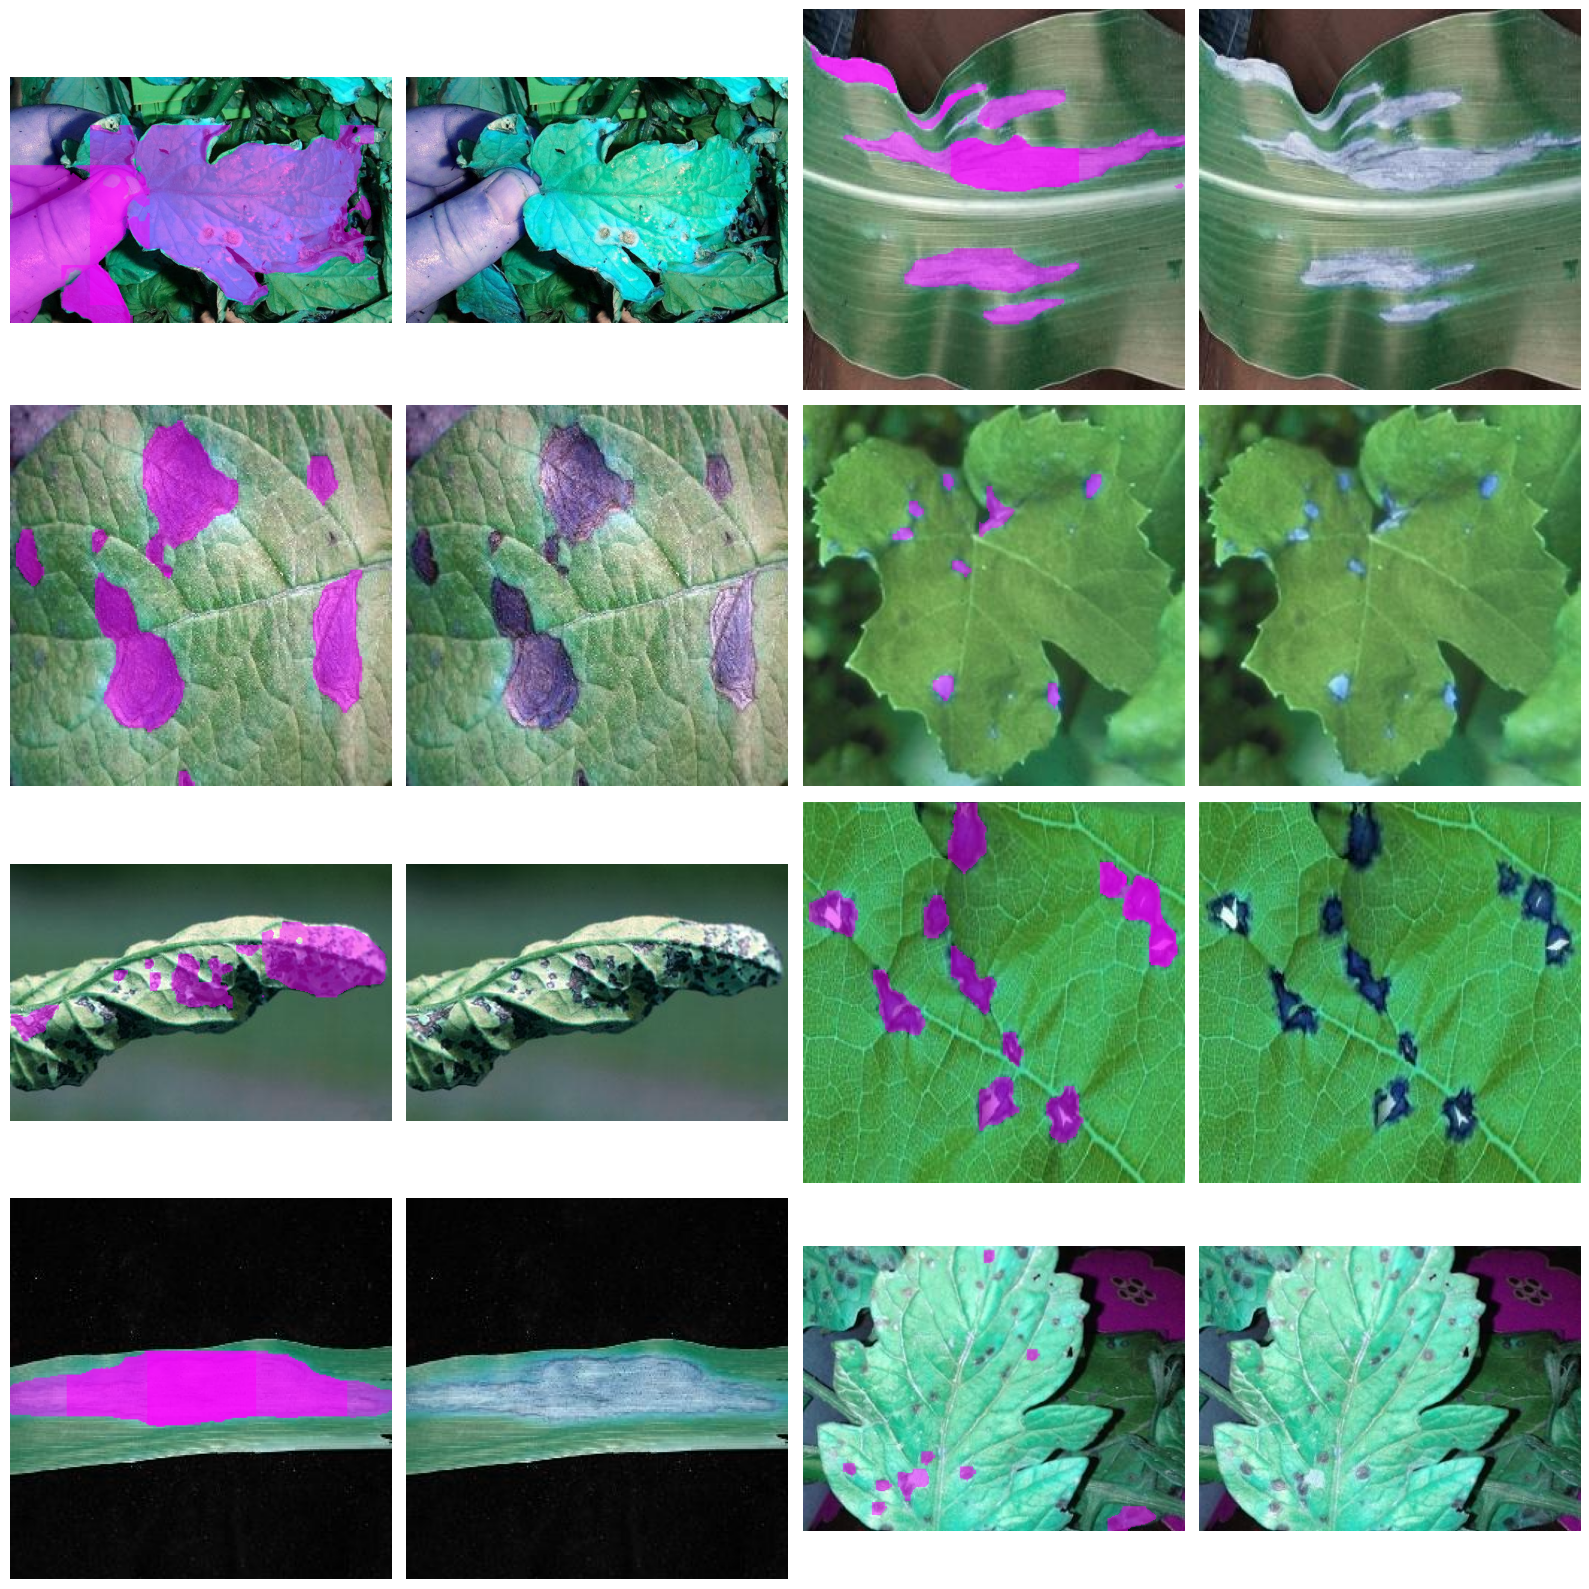

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/segment/leaf_disease_segmentation_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'test'
test_images_dir = 'datasets/leaf_disease_segmentation/train/images'

# Define colors for visualization
color_sample = {
    0 : (0, 0, 0),
    1 : (255, 0, 255),      # Green
}

image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(8):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_path)[0]
    # print(results)

    if results.masks:
      # Draw segmentation masks
      for seg in results.masks.data:
          mask = seg.cpu().numpy()
          # Resize mask to match image dimensions
          mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
          image_rgb = draw_segmentation(image_rgb, mask_resized, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

    # Plot the image
    ax[2 * idx + 1].imshow(image)
    ax[2 * idx + 1].axis('off')
    ax[2 * idx].imshow(image_rgb)
    ax[2 * idx].axis('off')

plt.tight_layout()
plt.show()
